<a href="https://colab.research.google.com/github/serafinazhang/Board-Game-Texual-Analysis/blob/main/WarGameAnalysis_CodeBook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Textual Analysis on War Games**

Junqian Zhang 张俊倩

In [1]:
import pandas as pd
import numpy as np
from collections import defaultdict, Counter
import matplotlib.pyplot as plt 
from google.colab import files, drive
import math
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import CCA
from sklearn.preprocessing import StandardScaler

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install nltk
import nltk 
nltk.download("all") 
from nltk import sent_tokenize
from nltk.corpus import stopwords, wordnet
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer 

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown.zip.
[nltk_data]    | Downloading package brown_tei to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown_tei.zip.
[nltk_data]    | Downloading package cess_cat to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_cat.zip.
[nltk_data]    | Downloading package cess_esp to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_esp.zip.
[nltk_data]    | Downloading package chat80 to /root/nltk_data...
[nltk_data]    |   Unzipp

In [ ]:
!pip install gensim
import gensim
from gensim.models import Word2Vec

# 1 Data Loading

In [ ]:
!pip install xmltodict

In [ ]:
 import time
 import requests
 import xml.dom.minidom
 import xml.etree.ElementTree as ET
 import xmltodict

In [ ]:
meta = pd.read_csv('https://raw.githubusercontent.com/beefsack/bgg-ranking-historicals/master/2019-08-28.csv')
id = list(meta['ID'])

In [ ]:
def get_dict(index):
  root_p = 'https://www.boardgamegeek.com/xmlapi2/thing?id='
  url = root_p + str(id[index]) + '&stats=1&pagesize=100'
  r = requests.get(url)
  dict_data = xmltodict.parse(r.content)
  return dict_data

In [ ]:
def get_link(dict_data):
  link = defaultdict(list)
  for i in dict_data['items']['item']['link']:
    for k,v in i.items():
      link[k].append(v)
  return link

In [ ]:
def get_description(dict_data):
  description = dict_data['items']['item']['description']
  return description

In [ ]:
def get_stats(dict_data):
  rating = pd.DataFrame(dict_data['items']['item']['statistics']['ratings'])
  try:
    rating['ranks']['@value'] = dict_data['items']['item']['statistics']['ratings']['ranks']['rank'][0]['@value']
  except KeyError:
    rating['ranks']['@value'] = dict_data['items']['item']['statistics']['ratings']['ranks']['rank']['@value']
  rating = rating.drop('rank', axis=0)
  return rating

no 10353，11981, 12325, 12707, 15117， 15872, 16332, 16698, 16721

In [ ]:
for i in range(16722, len(id)):
  root_p = 'https://www.boardgamegeek.com/xmlapi2/thing?id='
  url = root_p + str(id[i]) + '&stats=1&pagesize=100'
  r = requests.get(url)
  while r.status_code != 200:
    time.sleep(1)
    r = requests.get(url)
  dict_data = xmltodict.parse(r.content)
  full['description'].append(get_description(dict_data))
  full['category'].append(get_link(dict_data)['@id'])
  full['id'].append(id[i])
  stats = get_stats(dict_data)
  full['stats'].append(stats.values)
  print(i)

16722
16723
16724
16725
16726
16727
16728
16729
16730
16731
16732
16733
16734
16735
16736
16737
16738
16739
16740
16741
16742
16743
16744
16745
16746
16747
16748
16749
16750
16751
16752
16753
16754
16755
16756
16757
16758
16759
16760
16761
16762
16763
16764
16765
16766
16767
16768
16769
16770
16771
16772
16773
16774
16775
16776
16777
16778
16779
16780
16781
16782
16783
16784
16785
16786
16787
16788
16789
16790
16791
16792
16793
16794
16795
16796
16797
16798
16799
16800
16801
16802
16803
16804
16805
16806
16807
16808
16809
16810
16811
16812
16813
16814
16815
16816
16817
16818
16819
16820
16821
16822
16823
16824
16825
16826
16827
16828
16829
16830
16831
16832
16833
16834
16835
16836
16837
16838
16839
16840
16841
16842
16843
16844
16845
16846
16847
16848
16849
16850
16851
16852
16853
16854
16855
16856
16857
16858
16859
16860
16861
16862
16863
16864
16865
16866
16867
16868
16869
16870
16871
16872
16873
16874
16875
16876
16877
16878
16879
16880
16881
16882
16883
16884
16885
16886
16887
1688

In [ ]:
full_data = pd.DataFrame(full)
full_data.to_csv('full_data.csv')

In [ ]:
from google.colab import files
files.download('full_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
full1 = pd.read_csv('/content/drive/MyDrive/information retrieval/full_data_8047.csv')
full2 = pd.read_csv('/content/drive/MyDrive/information retrieval/full_data_15116.csv')
full3 = pd.read_csv('/content/drive/MyDrive/information retrieval/full_data_end.csv')

In [ ]:
full = pd.concat([full1,full2,full3], axis = 0)

In [ ]:
full = full.drop(['Unnamed: 0'], axis = 1).reset_index().drop(['index'], axis = 1)

In [ ]:
def clean_cat(lis):
  cat = []
  c = lis.split(',')
  for j in c:
    cat.append(j[2:-1])
  return cat

In [ ]:
full ['category'] = full['category'].apply(clean_cat)

In [ ]:
full.to_csv('/content/drive/MyDrive/information retrieval/full_data.csv')

In [ ]:
war = full['category'][0][:9]

In [ ]:
war

['1022', '1020', '1010', '1046', '1047', '2689', '2839', '2018', '2857']

In [ ]:
selection = []
for c in range(len(full)):
  b = any(i in full['category'][c] for i in war)
  selection.append(b)

In [ ]:
full['selection'] = selection

In [ ]:
wargame = full[full['selection']==True]

In [ ]:
stats_name = get_stats(get_dict(174430)).columns
stats_name

Index(['usersrated', 'average', 'bayesaverage', 'ranks', 'stddev', 'median',
       'owned', 'trading', 'wanting', 'wishing', 'numcomments', 'numweights',
       'averageweight'],
      dtype='object')

In [ ]:
stats_name_f = ['average', 'bayesaverage', 'stddev', 'averageweight']
stats_name_i = [item for item in stats_name if item not in stats_name_f]

In [ ]:
id = list(wargame['id'])

In [ ]:
stats_dict = defaultdict(list)

In [ ]:
for i in range(len(wargame)):
  root_p = 'https://www.boardgamegeek.com/xmlapi2/thing?id='
  url = root_p + str(id[i]) + '&stats=1&pagesize=100'
  r = requests.get(url)
  while r.status_code != 200:
    time.sleep(0.5)
    r = requests.get(url)
  f = xmltodict.parse(r.content)
  st = get_stats(f)
  for s in stats_name_f:
    stats_dict[s].append(float(st[s]))
  for ss in stats_name_i:
    try:
      stats_dict[ss].append(int(st[ss]))
    except ValueError:
      stats_dict[ss].append(0)
  print(i)

1574
1575
1576
1577
1578
1579
1580
1581
1582
1583
1584
1585
1586
1587
1588
1589
1590
1591
1592
1593
1594
1595
1596
1597
1598
1599
1600
1601
1602
1603
1604
1605
1606
1607
1608
1609
1610
1611
1612
1613
1614
1615
1616
1617
1618
1619
1620
1621
1622
1623
1624
1625
1626
1627
1628
1629
1630
1631
1632
1633
1634
1635
1636
1637
1638
1639
1640
1641
1642
1643
1644
1645
1646
1647
1648
1649
1650
1651
1652
1653
1654
1655
1656
1657
1658
1659
1660
1661
1662
1663
1664
1665
1666
1667
1668
1669
1670
1671
1672
1673
1674
1675
1676
1677
1678
1679
1680
1681
1682
1683
1684
1685
1686
1687
1688
1689
1690
1691
1692
1693
1694
1695
1696
1697
1698
1699
1700
1701
1702
1703
1704
1705
1706
1707
1708
1709
1710
1711
1712
1713
1714
1715
1716
1717
1718
1719
1720
1721
1722
1723
1724
1725
1726
1727
1728
1729
1730
1731
1732
1733
1734
1735
1736
1737
1738
1739
1740
1741
1742
1743
1744
1745
1746
1747
1748
1749
1750
1751
1752
1753
1754
1755
1756
1757
1758
1759
1760
1761
1762
1763
1764
1765
1766
1767
1768
1769
1770
1771
1772
1773


In [ ]:
stats = pd.DataFrame(stats_dict)

In [ ]:
stats.to_csv('/content/drive/MyDrive/information retrieval/stats.csv')

# 2 Query

## 2.1 Text Cleaning

In [ ]:
full = pd.read_csv('/content/drive/MyDrive/information retrieval/full_data.csv')

In [ ]:
wargame = full[full['selection']==True]

In [ ]:
sentences = [] # each description as a doc
for i in wargame['description']:
    s = sent_tokenize(i)
    sentences.append(s)
sentences[0]

['Gloomhaven  is a game of Euro-inspired tactical combat in a persistent world of shifting motives.',
 'Players will take on the role of a wandering adventurer with their own special set of skills and their own reasons for traveling to this dark corner of the world.',
 'Players must work together out of necessity to clear out menacing dungeons and forgotten ruins.',
 'In the process, they will enhance their abilities with experience and loot, discover new locations to explore and plunder, and expand an ever-branching story fueled by the decisions they make.&#10;&#10;This is a game with a persistent and changing world that is ideally played over many game sessions.',
 'After a scenario, players will make decisions on what to do, which will determine how the story continues, kind of like a &ldquo;Choose Your Own Adventure&rdquo; book.',
 'Playing through a scenario is a cooperative affair where players will fight against automated monsters using an innovative card system to determine the

In [ ]:
# tokenization
token_list= []
for i in sentences: # i is comment level
    for j in i:
      tokens = word_tokenize(j)
      words = [word for word in tokens if word.isalpha()]
      words = [word.lower() for word in words]
      token_list.append(words)

In [ ]:
# lemmatization
lemmatizer = WordNetLemmatizer() 
def pos_tagger(nltk_tag): 
    if nltk_tag.startswith('J'): 
        return wordnet.ADJ 
    elif nltk_tag.startswith('V'): 
        return wordnet.VERB 
    elif nltk_tag.startswith('N'): 
        return wordnet.NOUN 
    elif nltk_tag.startswith('R'): 
        return wordnet.ADV 
    else:           
        return None
lemma_list = []
for i in token_list:
  pos_tagged = nltk.pos_tag(i)
  wordnet_tagged = list(map(lambda x: (x[0], pos_tagger(x[1])), pos_tagged))
  lemma = [] 
  for word, tag in wordnet_tagged:
    if word == "i":
      continue
    if tag is None: 
      # if there is no available tag, append the token as is 
      lemma.append(word) 
    else:         
      # else use the tag to lemmatize the token 
      lemma.append(lemmatizer.lemmatize(word, tag))
  lemma_list.append(lemma)

## 2.2 Query Extraction

In [ ]:
bi = []
for item in lemma_list:
  grams = [item[i:i+2] for i in range(len(item)-2+1)]
  bigrams = [' '.join(j) for j in grams]
  bi.append(bigrams)

In [ ]:
bi_v = [bigram for i in bi for bigram in i]
uni_v = [unigram for i in lemma_list for unigram in i]

In [ ]:
counter_bi = Counter(bi_v)
counter_uni = Counter(uni_v)

In [ ]:
# filter before computing for less noise
for i in list(counter_bi.keys()):
  if i.split()[0] in stopwords.words('english'):
    if i.split()[1] in stopwords.words('english'):
      counter_bi.pop(i)

In [ ]:
for i in list(counter_bi.keys()):
  w,t = nltk.pos_tag(i.split())[0]
  w1,t1 = nltk.pos_tag(i.split())[1]
  if t[0] != "N":
    if t1[0] != "N":
      counter_bi.pop(i)

In [ ]:
def pmi_index(bigram):
  a, b = bigram.split()
  pmi = math.log(counter_bi[bigram]/((counter_uni[a]-counter_bi[bigram])*(counter_uni[b]-counter_bi[bigram])/(len(uni_v)-counter_bi[a])))
  return pmi

In [ ]:
counter_b = counter_bi.most_common(100)

In [ ]:
bi_gram_list = [k for (k,v) in counter_b]

In [ ]:
frequency = [v for (k,v) in counter_b]

In [ ]:
pmi = [pmi_index(k) for (k,v) in counter_b]

In [ ]:
fre_df = pd.DataFrame({"bigram":bi_gram_list, "pmi":pmi, "frequency": frequency})

In [ ]:
fre_most = fre_df.sort_values(by="pmi", ascending=False).head(50)
fre_most

,bigram,pmi,frequency
4,rsquo s,8.795744,1064
76,consist of,7.150485,288
85,depend on,7.052704,252
41,description from,6.813566,492
89,mdash description,6.786246,240
49,victory point,5.930114,423
52,attempt to,5.589324,358
6,try to,5.497567,932
24,base on,5.133301,619
18,your opponent,4.920667,658


In [ ]:
select = fre_most.drop([4, 76, 85, 41, 89, 52, 6, 24, 69, 13, 12, 58, 40, 42, 79, 48, 23, 50, 68, 95, 74, 22, 94, 65, 38, 36, 47], axis = 0)
select_bi = select["bigram"]

In [ ]:
bi_dict = defaultdict(list)
for bi in select_bi:
  f,s = bi.split()
  bi_dict[f].append(s)

In [ ]:
sent_c = []
for sent in lemma_list: 
  if len(sent) > 1:
    sent_list = []
    for i in range(len(sent)-1):
      if sent[i] in list(bi_dict.keys()):
        if sent[i+1] in bi_dict[sent[i]]:
          bi = sent[i] + " " + sent[i+1]
          sent_list.append(bi)
        else:
          if sent[i] not in stopwords.words('english'):
            sent_list.append(sent[i])  
      else:
        if sent[i] not in stopwords.words('english'):
          sent_list.append(sent[i]) 
    sent_c.append(sent_list)
  elif len(sent) == 1:
    if sent[0] not in stopwords.words('english'):
      sent_c.append(sent)
    else:
      sent_c.append([])
  else:
    sent_c.append([])

In [ ]:
sent1 = [] # game level
for c in sentences:
  ll = []
  for s in c:
    tokens = word_tokenize(s)
    words = [word for word in tokens if word.isalpha()]
    words = [word.lower() for word in words]
    words = [word for word in words if word != 'i']
    ll.append(words)
  sent1.append(ll)

In [ ]:
num_com = len(sentences)

In [ ]:
com_sent = [] # basic list is sentence
count = 0
for i in range(num_com):
  end = count + len(sent1[i])
  cc = sent_c[count:end]
  com_sent.append(cc)
  count = end

In [ ]:
comment = [] # basic list is comment
for com in com_sent:
  c = []
  for sent in com:
    for wor in sent:
      c.append(wor)
  comment.append(c)

In [ ]:
noun = []
for com in comment:
  c = []
  for wor in com:
    if wor in select_bi:
      c.append(wor)
    else:
      w, t = nltk.pos_tag([wor])[0]
      if t[0] == "N":
        c.append(wor)
  noun.append(c)

In [ ]:
words = [wor for c in noun for wor in c]

In [ ]:
v_n = [n for n,c in Counter(words).most_common(500)]

In [ ]:
df = pd.DataFrame({"text":comment})
df['text'] = df['text'].apply(lambda x: ' '.join([word for word in x]))
vectorizer = TfidfVectorizer(vocabulary=v_n, ngram_range=(1,2))
TF_IDF = vectorizer.fit_transform(df['text'].values)
TF_IDF_array = TF_IDF.toarray()

In [ ]:
sum = np.sum(TF_IDF_array,axis=0).tolist()

In [ ]:
rank = pd.DataFrame({"feature":vectorizer.get_feature_names(),"index": sum}).sort_values("index", ascending=False)
rank.head(20)

,feature,index
1,game,590.878288
0,player,523.143468
2,card,388.984747
4,quot,279.228960
5,play,209.589576
3,the game,208.471169
6,use,163.147215
24,world,156.243143
65,end,149.499274
7,turn,146.860133


In [ ]:
aspects = rank.head(20)["feature"]

In [ ]:
aspects

1          game
0        player
2          card
4          quot
5          play
3      the game
6           use
24        world
65          end
7          turn
26        board
9         point
8        battle
34     opponent
11    character
15         hero
10          set
14         rule
19          war
16       action
Name: feature, dtype: object

## 2.3 Query Expansion

In [ ]:
www = [word for item in sent_c for word in item]
len(Counter(www).keys())

In [ ]:
def skip(sent, n=3, s=2):
  k_grams = []
  for i in range(len(sent)):
    for z in range(s):
      seq = [sent[i]] + sent[i+z+1:i+z+n]
      if len(seq) == n and seq not in k_grams:
        k_grams.append(list(seq))
  return k_grams  

In [ ]:
sent_c1 = [sent for sent in sent_c if sent != []]

In [ ]:
sequences = []
for i in sent_c1:
  l = skip(i)
  sequences.append(l)

In [ ]:
sequences = [sent for sent in sequences if sent != []]
seq = [s for sent in sequences for s in sent]

In [ ]:
seq[:10]

In [ ]:
model = Word2Vec(seq, min_count=50)

In [ ]:
word = 'game'
model.wv.most_similar(positive=word)

In [ ]:
aspect_c = defaultdict(list)
for i in aspects:
  similar = model.wv.most_similar(positive=i)
  for w, s in similar:
    aspect_c[i].append(w)

In [ ]:
category = dict(aspect_c)

In [ ]:
for (a, s) in category.items():
  for wor in s:
    w,t = nltk.pos_tag([wor])[0]
    if t[0] != 'N':
      category[a].remove(wor)

In [ ]:
category = {'action': ['movement', 'account', 'perform', 'execute', 'impulse', 'activation', 'extent', 'planning', 'program', 'manoeuvre'], 
            'battle': ['combat', 'confrontation', 'duel', 'gunfight', 'clash', 'fight', 'malifaux', 'conflict', 'dogfight'],
            'board': ['flick', 'hexagonal', 'game board', 'interlock', 'overlay', 'modular', 'blank', 'tall', 'disc', 'square'],
            'card': ['drawn', 'played', 'pair', 'refill', 'letter', 'icon', 'discard', 'impulse'],
            'character': ['hero', 'wrestler', 'trait', 'fighter', 'attribute', 'battleboard', 'class', 'signature', 'roster'],
            'end': ['end of', 'game end', 'continue', 'victor', 'feed', 'remainder', 'exhaust', 'vps', 'finish'],
            'game': ['gameplay', 'format', 'layer', 'soundtrack', 'humorous', 'cd', 'meaning', 'the game', 'this game', 'meaning', 'proceeds', 'battleboard', 'additionally', 'fifth', 'exhibition'],
            'hero': ['adventurer', 'character', 'villain', 'roster', 'henchman', 'survivor', 'minion', 'gladiator', 'posse','warrior'],
            'opponent': ['your opponent', 'outwit', 'opposition', 'thwart', 'outmaneuver', 'authority', 'attacker', 'jojo'],
            'play': ['played', 'draft', 'recommend', 'multiplayer', 'dealt', 'reshuffle', 'accommodate'],
            'player': ['loser', 'clockwise', 'jojo', 'coach', 'gangster', 'challenger', 'process', 'proceed'],
            'point': ['vp', 'vps', 'bonus','victory point', 'prestige', 'majority', 'tally'],
            'quot': ['bang', 'x', 'stuff', 'loop', 'sturdy', 'yes', 'cabo', 'erase', 'undo', 'write'],
            'rule': ['beginner', 'rulebook', 'ruleset', 'explain', 'comprehensive', 'format', 'diceland', 'hardback', 'introduction'],
            'set': ['pack', 'infinity', 'warhammer', 'battleground', 'content', 'jedi', 'package'],
            'turn': ['clockwise', 'each turn', 'meter', 'cell', 'month', 'proceed', 'repeat', 'forfeit'],
            'use': ['allocate', 'combine', 'drafting', 'regulate', 'activate', 'assortment', 'interact','manipulation'],
            'war': ['empires', 'pacific','confrontation', 'revolution', 'europe', 'george', 'savage'],
            'world': ['deeply', 'reshape', 'horizon', 'the world', 'realm', 'greece', 'universe', 'history','reality']}

In [ ]:
for k in category.keys():
  category[k].append(k)

In [ ]:
c_v = [wor for k,v in category.items() for wor in v]

In [ ]:
dd = [] # the cleaned description collection
for com in com_sent:
  ccc = []
  for sent in com:
    ss = []
    for wor in sent:
      if wor not in c_v:
        ss.append(wor)
      else:
        for k in category.keys():
          if wor in category[k]:
            ss.append(k)
    ccc.append(ss)
  dd.append(ccc)

# 3 Query-Based Extractive Summarization

## 3.1 Sentence Extraction

In [ ]:
def skip(sent, n=3, s=2):
  k_grams = []
  for i in range(len(sent)):
    for z in range(s):
      seq = [sent[i]] + sent[i+z+1:i+z+n]
      if len(seq) == n and seq not in k_grams:
        k_grams.append(list(seq))
  return k_grams  

In [ ]:
dd_sent = []
for d in dd:
  for i in d:
    if i !=[]:
      dd_sent.append(i)

In [ ]:
len(dd_sent)

35811

In [ ]:
sequences = []
for i in dd_sent:
  l = skip(i)
  sequences.append(l)

In [ ]:
sequences = [sent for sent in sequences if sent != []]
seq = [s for sent in sequences for s in sent]

In [ ]:
seq[:10]

[['gloomhaven', 'game', 'tactical'],
 ['gloomhaven', 'tactical', 'battle'],
 ['game', 'tactical', 'battle'],
 ['game', 'battle', 'persistent'],
 ['tactical', 'battle', 'persistent'],
 ['tactical', 'persistent', 'world'],
 ['battle', 'persistent', 'world'],
 ['battle', 'world', 'shift'],
 ['persistent', 'world', 'shift'],
 ['player', 'take', 'the role']]

In [ ]:
model2 = Word2Vec(seq, min_count=50)

In [ ]:
ddd = []
for i in dd:
  sss = []
  for j in i:
    if j != []:
      sss.append(j)
  ddd.append(sss)

In [ ]:
def relatedness_sore(cat):
  score = []
  for item in ddd:
    d_s = []
    for sen in item:
      sim = []
      for wor in sen:
        try:
          sim.append(model2.wv.similarity(wor, cat))
        except KeyError:
          sim.append(0)
      d_s.append(np.array(sim).mean())
    score.append(d_s)
  return score

In [ ]:
relatedness = defaultdict(list)
for c in category.keys():
  score = relatedness_sore(c)
  relatedness[c].append(score)

In [ ]:
relatedness_save = []
for i in category.keys():
  z = np.array(relatedness[i][0])
  relatedness_save.append(z)
relatedness_save = np.array(relatedness_save)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
np.array(relatedness_save,dtype=object).dump(open('/content/drive/MyDrive/information retrieval/relatedness_save.npy', 'wb')) 

In [ ]:
relatedness_save = np.load('/content/drive/MyDrive/information retrieval/relatedness_save.npy', allow_pickle=True)

In [ ]:
relatedness = defaultdict(list)
for i in range(19):
  keys = list(category.keys())
  relatedness[keys[i]] = relatedness_save[i]

In [ ]:
max_sim = defaultdict(list)
for i in category.keys():
  for j in relatedness[i]:
    max_sim[i].append(round(max(j),2))

(array([1.215e+03, 2.591e+03, 6.490e+02, 1.170e+02, 2.400e+01, 6.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 2.000e+00]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

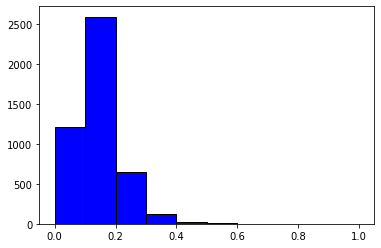

In [ ]:
plt.hist(max_sim['war'], color = 'blue', edgecolor = 'black')

In [ ]:
# threshold to extract sentence is 0.15

In [ ]:
def related_sentence(cat):
  cat_sent = []
  for i in range(4605):
    sent_score = relatedness[cat][i]
    ss = []
    for s in range(len(sent_score)):
      if sent_score[s] > 0.13:
        ss.append(ddd[i][s])
    cat_sent.append(ss)
  return cat_sent

In [ ]:
extracted_sentence = defaultdict(list)
for i in category.keys():
  cat_sent = related_sentence(i)
  extracted_sentence[i] = cat_sent

## 3.2 Document Comparison

In [ ]:
compare = defaultdict(list)
for c in category.keys():
  for des in extracted_sentence[c]:
    ex_list = []
    for sent in des:
      for wor in sent:
        ex_list.append(wor)
    compare[c].append(ex_list)

In [ ]:
vvv = []
for i in compare['action']:
  for wor in i:
    vvv.append(wor)

In [ ]:
def tf_idf(cat):
  df = pd.DataFrame({"text":compare[cat]})
  df['text'] = df['text'].apply(lambda x: ' '.join([word for word in x]))
  words = []
  for i in compare[cat]:
    for wor in i:
      words.append(wor)
  vv = [n for n,c in Counter(words).most_common(500)]
  vectorizer = TfidfVectorizer(vocabulary=vv, ngram_range=(1,2))
  TF_IDF = vectorizer.fit_transform(df['text'].values)
  TF_IDF_array = TF_IDF.toarray()
  return TF_IDF_array

In [ ]:
tf_idf('action')[0].shape

(500,)

In [ ]:
def doc_sim(tf_idf_arr):
  cs_list = []
  for i in range(4605):
    cos_sim = np.dot(tf_idf_arr[0], tf_idf_arr[i])/(np.linalg.norm(tf_idf_arr[0])*np.linalg.norm(tf_idf_arr[i]))
    cs_list.append(round(cos_sim,4))
  return cs_list

In [ ]:
doc_cs = defaultdict(list)
for i in category.keys():
  arr = tf_idf(i)
  cs_list = doc_sim(arr)
  doc_cs[i] = cs_list

In [ ]:
doc_similarity = pd.DataFrame(doc_cs)

In [ ]:
doc_similarity

,action,battle,board,card,character,end,game,hero,opponent,play,player,point,quot,rule,set,turn,use,war,world
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,0.1764,0.2399,0.1681,0.1505,0.1733,0.1913,0.1898,0.1666,0.1176,0.1476,0.1665,0.1703,0.1138,0.1658,0.2042,0.2069,0.1849,0.2827,0.2140
2,0.0639,0.0906,0.0648,0.0673,0.0760,0.0815,0.0779,0.0845,0.0862,0.0873,0.0750,0.0359,NaN,0.0705,0.0742,0.0259,0.0878,0.0601,0.0616
3,0.3090,0.2585,0.2829,0.2558,0.2610,0.2698,0.2791,0.2959,0.2895,0.2804,0.2809,0.2691,NaN,0.2187,0.2694,0.2751,0.2655,0.0266,0.2166
4,0.2650,0.2537,0.2745,0.2668,0.2741,0.2418,0.2666,0.2826,0.2819,0.2626,0.2468,0.2462,0.0000,0.1511,0.1923,0.2684,0.2763,0.0400,0.0789
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4600,0.1279,0.1785,0.1502,0.1719,0.1377,0.1061,0.1231,0.1476,0.1445,0.1147,0.1484,0.0958,NaN,0.0000,0.1458,0.1537,0.1694,0.1201,0.1956
4601,0.1243,0.0000,0.1120,0.1276,0.0000,0.0797,0.0887,0.0236,0.1076,0.0752,0.1283,0.1110,0.0000,0.0906,0.0524,0.1223,0.0886,0.0000,0.0000
4602,0.0600,0.0647,0.0601,0.1107,0.0819,0.0961,0.0807,0.0770,NaN,0.0994,0.1060,0.0623,0.0778,0.0599,0.0479,0.0840,0.0947,0.0000,0.0000
4603,0.4086,0.1909,0.4504,0.4048,0.3767,0.3709,0.4216,0.3412,0.3622,0.4135,0.4097,0.4024,0.4386,0.2528,0.2044,0.4007,0.4245,0.0457,0.0452


In [ ]:
doc_similarity = doc_similarity.fillna(0)

In [ ]:
doc_similarity.to_csv('/content/drive/MyDrive/information retrieval/doc_similarity_new.csv')

# 4 Canonical Correlation Analysis

In [3]:
doc_similarity = pd.read_csv('/content/drive/MyDrive/information retrieval/doc_similarity_new.csv', index_col=[0])

In [4]:
stats = pd.read_csv('/content/drive/MyDrive/information retrieval/stats.csv', index_col=[0])

In [5]:
stats

,average,bayesaverage,stddev,averageweight,usersrated,ranks,median,owned,trading,wanting,wishing,numcomments,numweights
0,8.76327,8.52830,1.63347,3.8677,45707,1,0,74082,575,1380,17148,8217,1980
1,8.28592,8.12217,1.57680,3.5889,42263,13,0,58378,885,1353,10733,9065,3622
2,8.42606,8.17359,1.37036,3.7231,24664,8,0,37699,282,1467,10851,3794,845
3,8.68477,8.25652,1.59831,4.2440,15049,6,0,19024,106,988,8683,2290,709
4,8.22490,8.07120,1.43721,3.4214,62008,14,0,82059,577,1929,18789,9485,2463
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4600,4.46917,5.04757,1.76446,1.4419,1107,21198,0,3141,89,10,121,338,43
4601,4.67013,5.10047,1.64223,1.0922,1317,21193,0,1522,15,9,36,372,141
4602,4.74356,5.01294,1.72663,1.1607,2589,21203,0,4320,47,10,50,1085,224
4603,4.20976,4.98251,1.76959,1.0532,986,21205,0,2648,80,9,32,649,94


In [6]:
stats = stats.drop(['bayesaverage', 'median', 'numcomments', 'ranks', 'numweights', 'usersrated'], axis=1)

In [7]:
stats

,average,stddev,averageweight,owned,trading,wanting,wishing
0,8.76327,1.63347,3.8677,74082,575,1380,17148
1,8.28592,1.57680,3.5889,58378,885,1353,10733
2,8.42606,1.37036,3.7231,37699,282,1467,10851
3,8.68477,1.59831,4.2440,19024,106,988,8683
4,8.22490,1.43721,3.4214,82059,577,1929,18789
...,...,...,...,...,...,...,...
4600,4.46917,1.76446,1.4419,3141,89,10,121
4601,4.67013,1.64223,1.0922,1522,15,9,36
4602,4.74356,1.72663,1.1607,4320,47,10,50
4603,4.20976,1.76959,1.0532,2648,80,9,32


In [8]:
def ref(lis):
  ref = []
  ref.append(lis[0])
  for i in range(1,len(lis)):
    ref.append(lis[i]-lis[0])
  return ref

In [9]:
for s in stats.columns:
  stats[s] = ref(stats[s])

In [10]:
stats

,average,stddev,averageweight,owned,trading,wanting,wishing
0,8.76327,1.63347,3.8677,74082,575,1380,17148
1,-0.47735,-0.05667,-0.2788,-15704,310,-27,-6415
2,-0.33721,-0.26311,-0.1446,-36383,-293,87,-6297
3,-0.07850,-0.03516,0.3763,-55058,-469,-392,-8465
4,-0.53837,-0.19626,-0.4463,7977,2,549,1641
...,...,...,...,...,...,...,...
4600,-4.29410,0.13099,-2.4258,-70941,-486,-1370,-17027
4601,-4.09314,0.00876,-2.7755,-72560,-560,-1371,-17112
4602,-4.01971,0.09316,-2.7070,-69762,-528,-1370,-17098
4603,-4.55351,0.13612,-2.8145,-71434,-495,-1371,-17116


In [11]:
stats = stats.drop([0], axis =0)

In [12]:
doc_similarity = doc_similarity.drop([0], axis =0)

In [13]:
cca = pd.concat([doc_similarity, stats], axis = 1)

In [14]:
 cor = round(cca.corr(),2)

<function matplotlib.pyplot.figure>

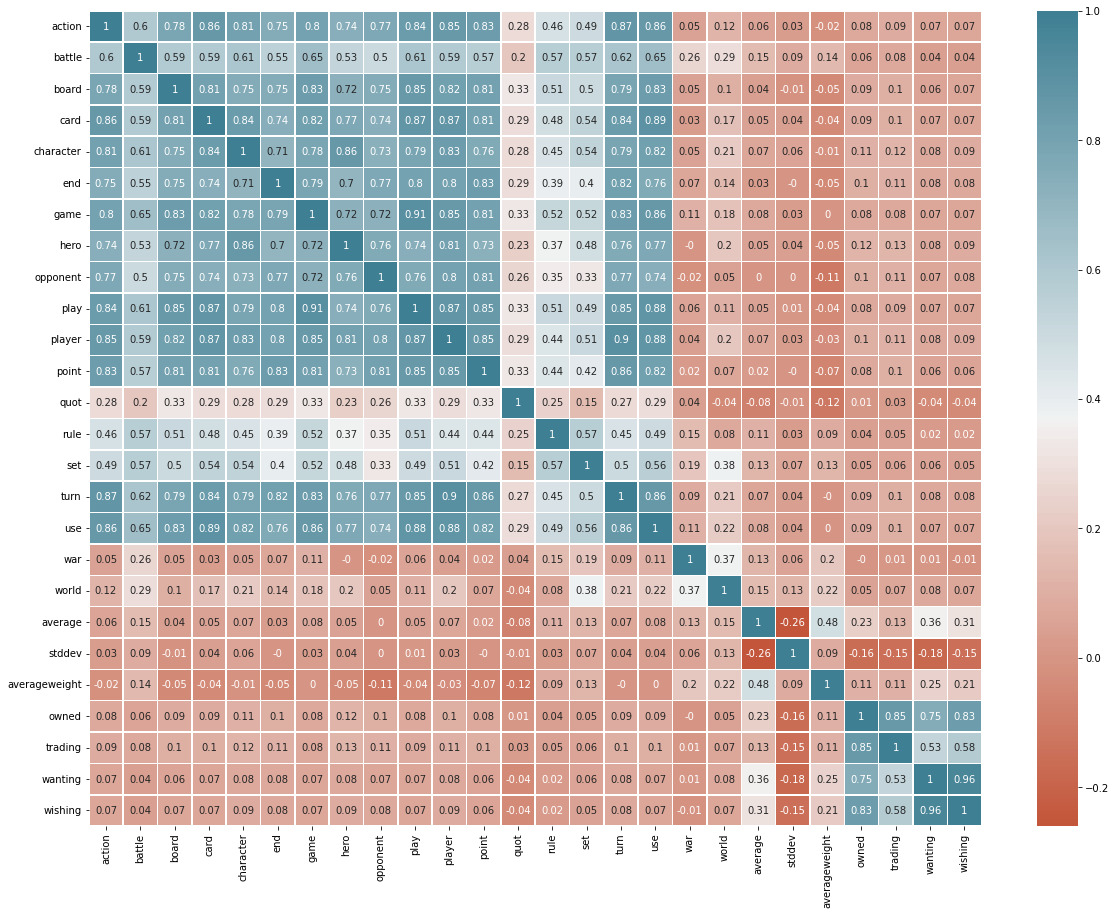

In [15]:
fig, ax = plt.subplots(figsize=(20,15))
sns.heatmap(cor, annot=True, annot_kws={"size": 10}, fmt='g', linewidths=.5, cmap=sns.diverging_palette(20, 220, n=200))
plt.figure

In [17]:
cor_dc = round(doc_similarity.corr(),2)

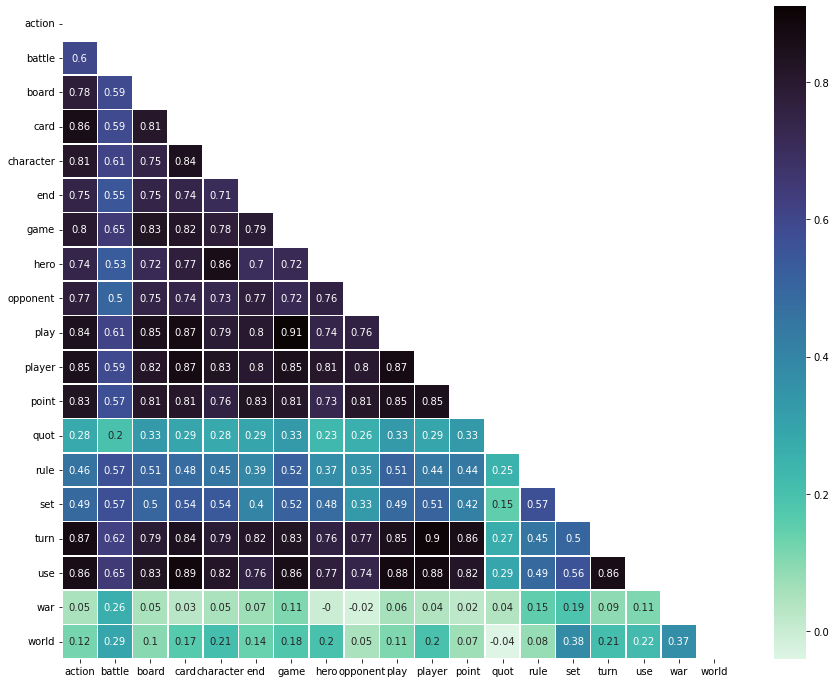

In [18]:
fig, ax = plt.subplots(figsize=(15,12))
sns.heatmap(cor_dc, annot=True, annot_kws={"size": 10}, fmt='g', linewidths=.5, cmap='mako_r', mask = np.triu(np.ones_like(cor_dc)))
plt.show()

In [20]:
std = StandardScaler()
doc_std = std.fit_transform(doc_similarity)

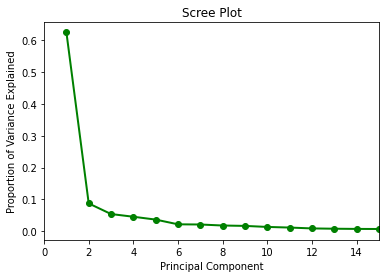

In [21]:
pca = PCA().fit(doc_std)
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'ro-', linewidth=2, color = 'green')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.xlim((0,15))
plt.ylabel('Proportion of Variance Explained')
plt.show()

In [22]:
ca = CCA(n_components=5)
ca.fit(doc_similarity, stats)

CCA(copy=True, max_iter=500, n_components=5, scale=True, tol=1e-06)

In [23]:
X_c, Y_c = ca.transform(doc_similarity, stats)

In [24]:
cc_res = pd.DataFrame({"CCX_1":X_c[:, 0], "CCY_1":Y_c[:, 0], "CCX_2":X_c[:, 1],"CCY_2":Y_c[:, 1]})

In [25]:
corr = [0]
for i in range(5):
  c = np.corrcoef(X_c[:, i], Y_c[:, i])[0,1]
  corr.append(c)

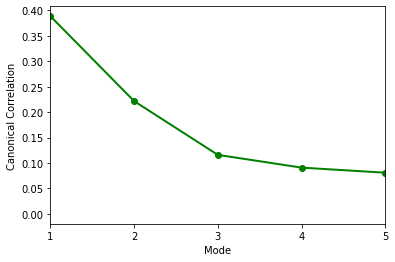

In [26]:
plt.plot(corr, 'ro-', linewidth=2, color = 'green')
plt.xlabel('Mode')
plt.xlim([1,5])
plt.xticks([1,2,3,4,5])
plt.ylabel('Canonical Correlation')
plt.figure
plt.savefig('cc.eps')

In [30]:
# correlation between the first pair of covariates
np.corrcoef(X_c[:, 0], Y_c[:, 0])

array([[1.        , 0.38829352],
       [0.38829352, 1.        ]])

In [31]:
# correlation between the second pair of covariates
np.corrcoef(X_c[:, 1], Y_c[:, 1])

array([[1.        , 0.22152773],
       [0.22152773, 1.        ]])

In [32]:
m, b = np.polyfit(X_c[:, 0], Y_c[:, 0], 1)

In [40]:
stats_raw = pd.read_csv('/content/drive/MyDrive/information retrieval/stats.csv', index_col=[0])

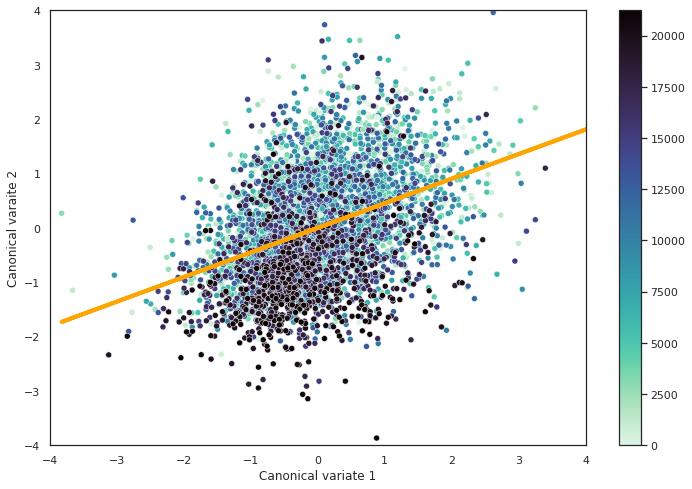

In [89]:
sns.set()
plt.figure(figsize=(12,8))
sns.set_style(style='white')
ax = sns.scatterplot(x="CCX_1", y="CCY_1", hue="rank", palette='mako_r', data=cc_res)
norm = plt.Normalize(cc_res['rank'].min(), cc_res['rank'].max())
sm = plt.cm.ScalarMappable(cmap="mako_r", norm=norm)
sm.set_array([])
ax.get_legend().remove()
ax.figure.colorbar(sm)
plt.plot(X_c[:, 0], m*X_c[:, 0]+b, color = 'orange', linewidth = 4)
plt.xlabel('Canonical variate 1')
plt.xlim([-4,4])
plt.ylim([-4,4])
plt.ylabel('Canonical varaite 2')
plt.figure
plt.savefig('rank.eps', bbox_inches='tight', pad_inches=0.0)

In [128]:
np.quantile(cc_res['rank'], [0,0.2, 0.4,0.6, 0.8,1])

array([    0. ,  2534.8,  5874.4,  9935.4, 15167.8, 21225. ])

In [132]:
def degree(lis):
  de = []
  for i in lis:
    if i < 3266:
      de.append('First')
    elif i >= 3266 and i <7805:
      de.append('Second')
    elif i >=7805 and i < 13746:
      de.append('Third')
    else:
      de.append('Fourth')
  return de

In [133]:
game_degree = degree(cc_res['rank'])

In [142]:
cc_res['Degree'] = game_degree

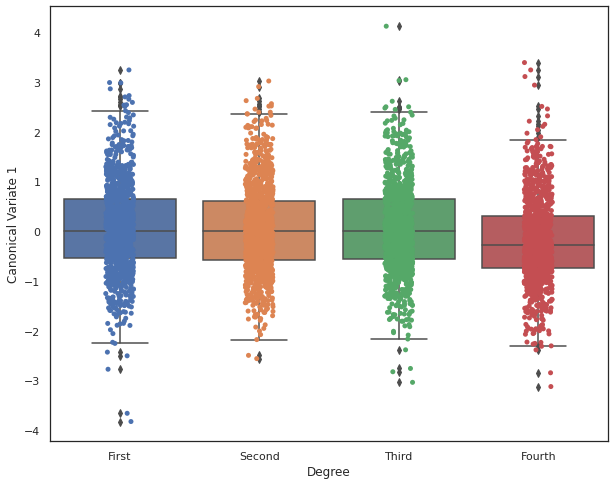

In [143]:
plt.figure(figsize=(10,8))
sns.boxplot(x="Degree",
                y="CCX_1", 
               data=cc_res)
sns.stripplot(x="Degree",
                y="CCX_1", 
                 data=cc_res)
plt.ylabel('Canonical Variate 1')
plt.savefig('boxplot1.eps', bbox_inches='tight', pad_inches=0.0)

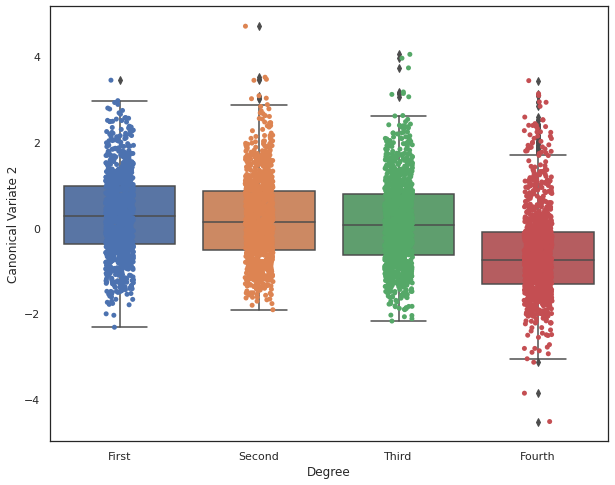

In [144]:
plt.figure(figsize=(10,8))
sns.boxplot(x="Degree",
                y="CCY_1", 
               data=cc_res)
sns.stripplot(x="Degree",
                y="CCY_1", 
                 data=cc_res)
plt.ylabel('Canonical Variate 2')
plt.savefig('boxplot2.eps', bbox_inches='tight', pad_inches=0.0)

In [115]:
ccc = cc_res[['CCX_1', 'CCY_2', 'rank']]

In [147]:
ccc.columns = ['Variate 1', 'Variate 2', "Rank"]

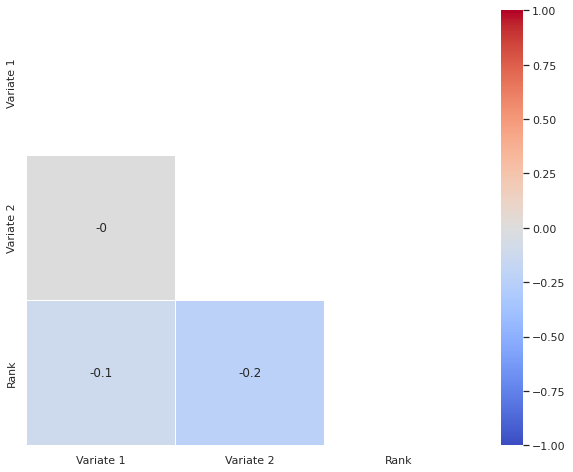

In [148]:
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(round(ccc.corr(),2), annot=True, fmt='.1g', linewidths=.5, cmap='coolwarm', mask = np.triu(np.ones_like(ccc.corr())), vmin=-1, vmax=1)
plt.figure
plt.savefig('compare.eps', bbox_inches='tight', pad_inches=0.0)